# K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/df_tight.csv')

In [3]:
df_mr = pd.read_csv('data/df_mr.csv')

### K-Means

Let's try a K-Means model for our categorical data (everything except flavours).

Before we can perform the K-Means model we'll have to separate out all numerical data. This includes a list of flavours. We'll apply a K-Modes model on the flavours below.

In [4]:
flavours = ['Sweet', 'Earthy', 'Spicy/Herbal', 'Tropical',
       'Pungent', 'Flowery', 'Blueberry', 'Berry', 'Pine', 'Woody', 'Citrus',
       'Diesel', 'Lemon_Lime', 'Appearment', 'Grape', 'Skunk', 'Apricot_Grapefruit']

In [5]:
# Set up df_num (numerical columns only)

no_flav = []
for column in df.columns:
    if column not in flavours:
        no_flav.append(column)

df_num = df[no_flav] # numeric dataframe
df_flav = df[flavours] # categorical dataframe - flavours

print(df_num.columns, "\n\n", df_flav.columns)

Index(['Strain', 'Lean', 'Eff_Focused', 'Med_Inflammation', 'Eff_Dizzy',
       'Eff_Energetic', 'Eff_Dry_eyes', 'Med_Lack_of_appetite', 'Eff_Happy',
       'Eff_Creative', 'Med_Muscle_spasms', 'Eff_Sleepy', 'Med_Stress',
       'Eff_Tingly', 'Eff_Aroused', 'Eff_Anxious', 'Med_Nausea', 'Med_Fatigue',
       'Med_Cramps', 'Eff_Uplifted', 'Eff_Headache', 'Eff_Talkative',
       'Eff_Paranoid', 'Eff_Hungry', 'Eff_Giggly', 'Med_Depression',
       'Eff_Relaxed', 'Med_Pain', 'Eff_Euphoric', 'Med_Eye_pressure',
       'Eff_Dry_mouth', 'Med_Headaches', 'Med_Insomnia', 'Rating_scaled',
       'Num_reviews_scaled', 'THC_scaled', 'Strain_type'],
      dtype='object') 

 Index(['Sweet', 'Earthy', 'Spicy/Herbal', 'Tropical', 'Pungent', 'Flowery',
       'Blueberry', 'Berry', 'Pine', 'Woody', 'Citrus', 'Diesel', 'Lemon_Lime',
       'Appearment', 'Grape', 'Skunk', 'Apricot_Grapefruit'],
      dtype='object')


In [6]:
# Get rid of the categorical columns "Strain" and "Strain_type"
df_num.drop('Strain_type', axis=1, inplace=True)
df_num.drop('Strain', axis=1, inplace=True)

In [7]:
# Apply Standard scaler - K-Means is a distance function

X = df_num.values # Define X (all columns of our DF)

X = StandardScaler().fit_transform(X) # Apply StandardScaler (mean=0, var=1)
df_num_scaled = pd.DataFrame(X, columns = df_num.columns)

In [8]:
X = df_num_scaled.values # SCALED DATA - Slight elbow around k = 2,3,4
# X = df_num.values # NON-SCALED DATA - Deeper elbow than non-scaled data. k = 2,3

k_range = np.arange(1,20)
inertia_list = []

for k in k_range:
    k_means_model = KMeans(n_clusters = k)
    k_means_model.fit(X)
    inertia_list.append(k_means_model.inertia_)

### Graph: K-Means inertias (k-values)

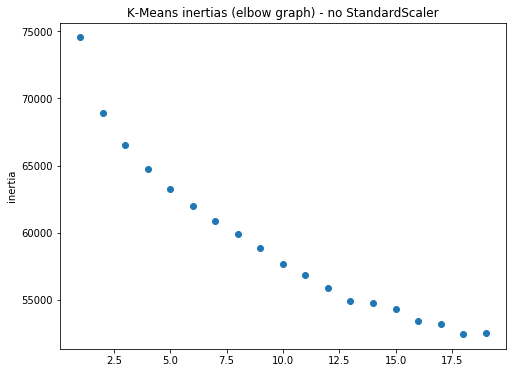

In [9]:
# Plot
plt.figure(figsize=(8,6))
figure = plt.scatter(k_range,inertia_list)
plt.ylabel('inertia')
# plt.xlabel('k')
plt.title('K-Means inertias (elbow graph) - no StandardScaler')
plt.show()
figure = figure.get_figure()
# figure.savefig('/Users/abgrss/Documents/Projects/Brain Station/00 Capstone project/graphs/K_means_inertias')

For our scaled data the inflection point of the elbow is very soft. It is slight and could be anywhere from 2-4, or maybe even higher. For our unscaled data, however, we get a much clearer elbow. k could be 2 or 3 but the dropoff after one is considerable, suggesting the distinctness of at least two groups.

Given these results, we will use df in this model going forward.

### K-Means: Strain type prediction

Let's see how well K-Means predicts Strain type.

In [10]:
X = df_num.drop('Lean', axis=1) # We must remove Lean if we're predicting Strain
# y2 = df.Strain_type
y = df.Strain_type.copy()

# Assign numerical labels to y (required for confusion matrix below)


y.loc[y == 'hybrid'] = 0
y.loc[y == 'sativa'] = 2
y.loc[y == 'indica'] = 1

In [11]:
# Apply train_test_split, stratified on Strain type.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [12]:
# K-Means, K = 2 
k2_means = KMeans(n_clusters = 2) # Instantiate
k2_means.fit(X_train) # Fit
y2_pred = k2_means.predict(X_train) # Predict

In [13]:
# K-Means, K = 3
k3_means = KMeans(n_clusters = 3) # Instantiate
k3_means.fit(X_train) # Fit
y3_pred = k3_means.predict(X_train) # Predict

Now we'll evaluate our models.

In [14]:
# Confusion matrices for k = 2, 3
k2_confusion_matrix = confusion_matrix(y_train, y2_pred)
k3_confusion_matrix = confusion_matrix(y_train, y3_pred)

display (k2_confusion_matrix)
display (k3_confusion_matrix)

array([[383, 389,   0],
       [ 36, 384,   0],
       [244,  55,   0]])

array([[172, 418, 182],
       [296, 108,  16],
       [ 18, 107, 174]])

Not an especially convincing confusion matrix, even if we rearrange our labels to give us the largest numbers on the diagonals. let's check the accuracy scores.

In [15]:
# Accuracy scores for k = 2, 3
k2_accuracy_score = accuracy_score(y_train, y2_pred)
k3_accuracy_score = accuracy_score(y_train, y3_pred)

print(f"k2 accuracy score: {k2_accuracy_score}")
print(f"k3 accuracy score: {k3_accuracy_score}")

k2 accuracy score: 0.5144198524480215
k3 accuracy score: 0.3044936284372904


For even just the train data, k3 most commonly gives a better accuracy, but it's still not great. Depending on how the variables are assigned I can only get this to be a maximum of about 61% at most, with lower scores being more common.

In [16]:
k3_means_all = KMeans(n_clusters = 3) # Instantiate
k3_means_all.fit(X) # Fit
y3_pred_all = k3_means_all.predict(X) # Predict
k3_accuracy_score_all = accuracy_score(y, y3_pred_all)
print(f"k3 accuracy score: {k3_accuracy_score_all}")

k3 accuracy score: 0.3004694835680751


For replicating our entire data set, we get a maximum accuracy of 60% (assuming the labels are properly allocated). Not amazing.

We'll run pairplots for all the X-columns for both k=2 and 3.

In [17]:
# # We can pairplot all these - takes a few minutes and is hard to read.

# X_y = pd.DataFrame(X_train) # To use seaborn you have to put it in a df
# X_y['label'] = k2_means.labels_ # seaborn wants all the labels in the same dataset

# figure = sns.pairplot(X_y, hue='label') # This is really, really big. Divide this up meaningfully.
# figure.savefig('/Users/abgrss/Documents/Projects/Brain Station/00 Capstone project/graphs/huge_pairplot')

Now we can try K-Modes and K-Protoypes to incorporate the categorical data, if desired.

K-modes and K-Prototype here: 

https://github.com/nicodv/kmodes/blob/master/README.rst